In [1]:
library('tidyverse')

Income = read_csv('https://raw.githubusercontent.com/rcjones9/Budget/main/JVG_df.csv', col_types = cols()) |>
    select(Role, Month, Date, Day, Shift, Time, Rate, Tips, Total)

head(Income)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
New names:
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`
• `` -> `...16`


Role,Month,Date,Day,Shift,Time,Rate,Tips,Total
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Training,March,3/22/22,Tuesday,Open,67.2,9.75,0,10.92
Training,March,3/25/22,Friday,Close,240.0,9.75,0,39.00
Training,March,3/26/22,Saturday,N/A,349.8,10.50,0,61.22
Training,March,3/28/22,Monday,Open,279.0,10.50,0,48.83
Training,March,3/30/22,Wednesday,Open,186.6,10.50,0,32.66
Training,March,3/31/22,Thursday,N/A,195.0,10.50,0,34.13


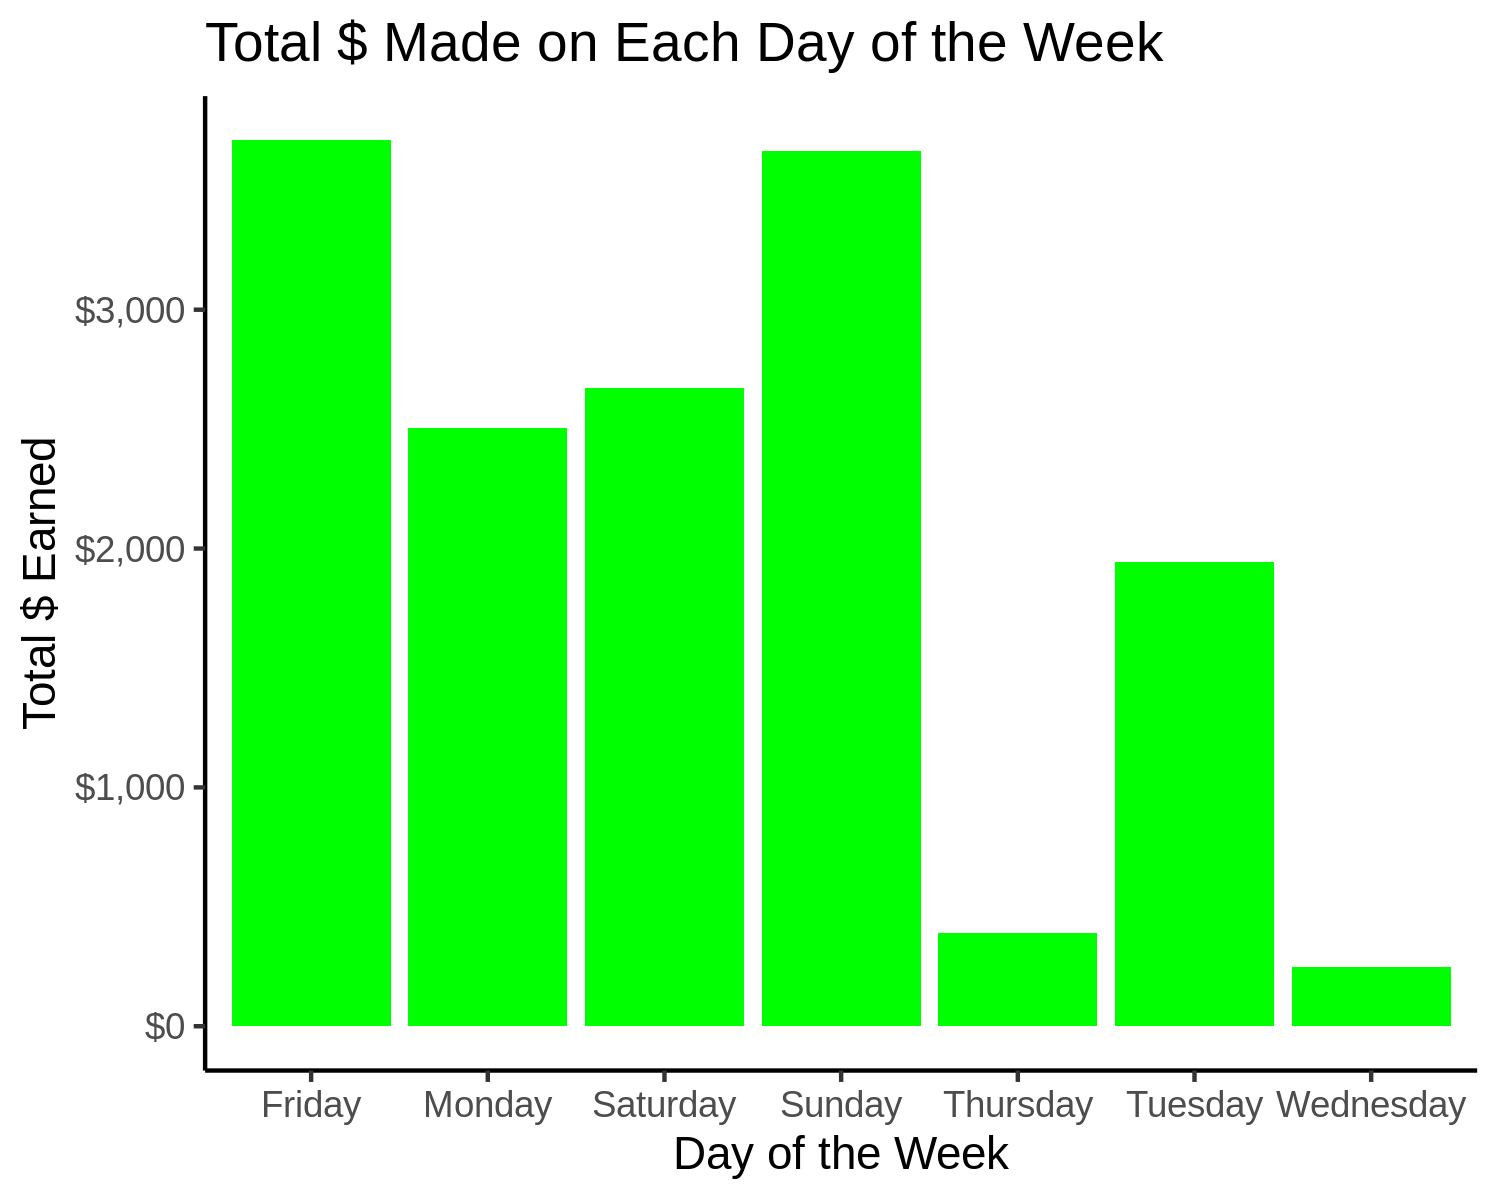

In [44]:
options(repr.plot.width=5, repr.plot.height=4)

p = ggplot(Income, aes(x=Day, y=Total)) +
    theme_classic() +
    geom_col(fill = 'green') +
    labs(title = "Total $ Made on Each Day of the Week", x = "Day of the Week", y = "Total $ Earned") +
    scale_y_continuous(labels = scales::dollar)


p

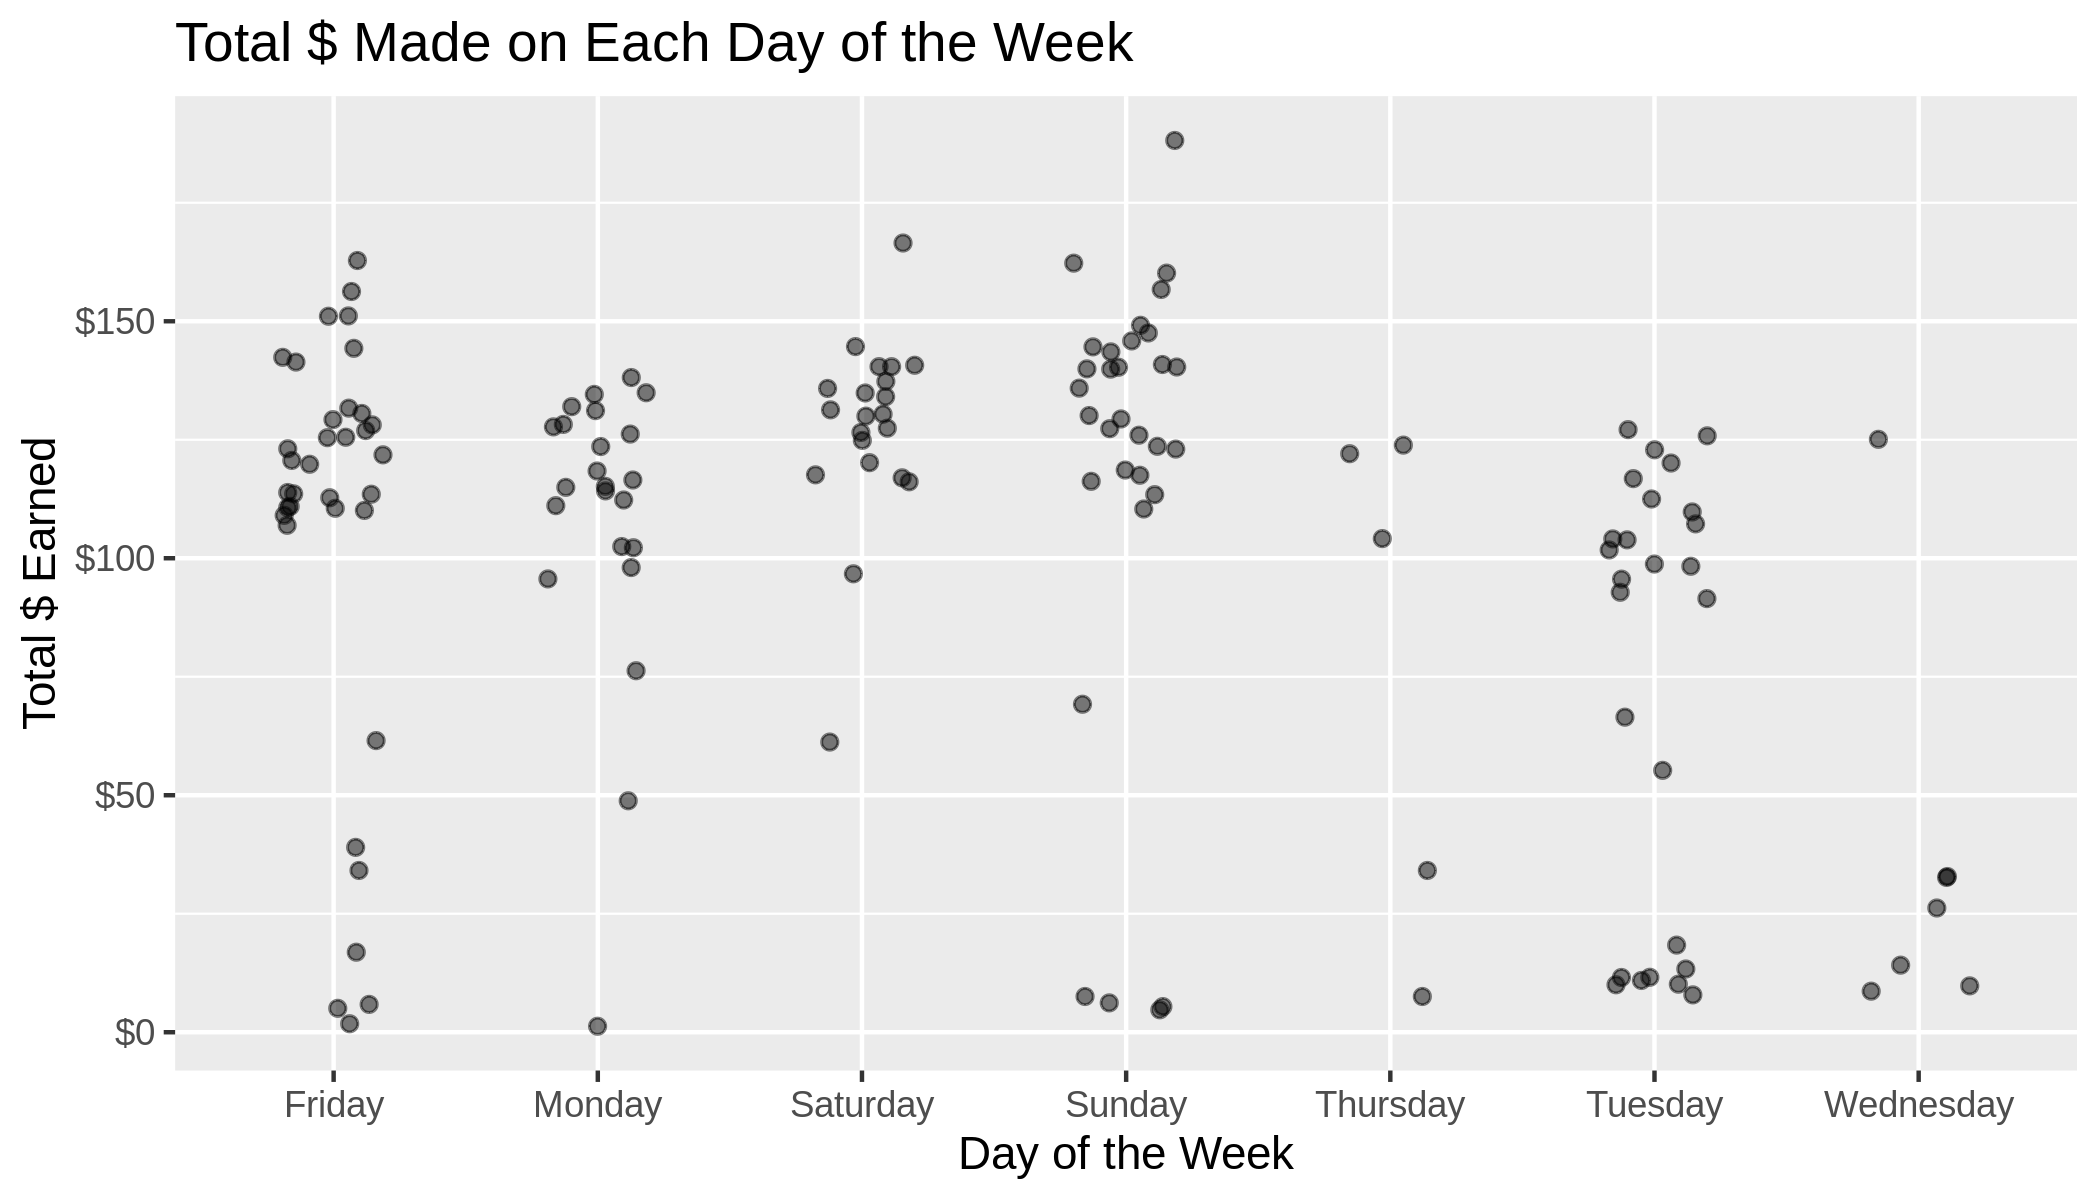

In [3]:
options(repr.plot.width=7, repr.plot.height=4)

p2 = ggplot(Income, aes(x = Day, y = Total)) +
    geom_point(position = position_jitter(w=0.2, h=0), alpha=0.5) +
    labs(title = "Total $ Made on Each Day of the Week", x = "Day of the Week", y = "Total $ Earned") +
    scale_y_continuous(labels = scales::dollar)

p2

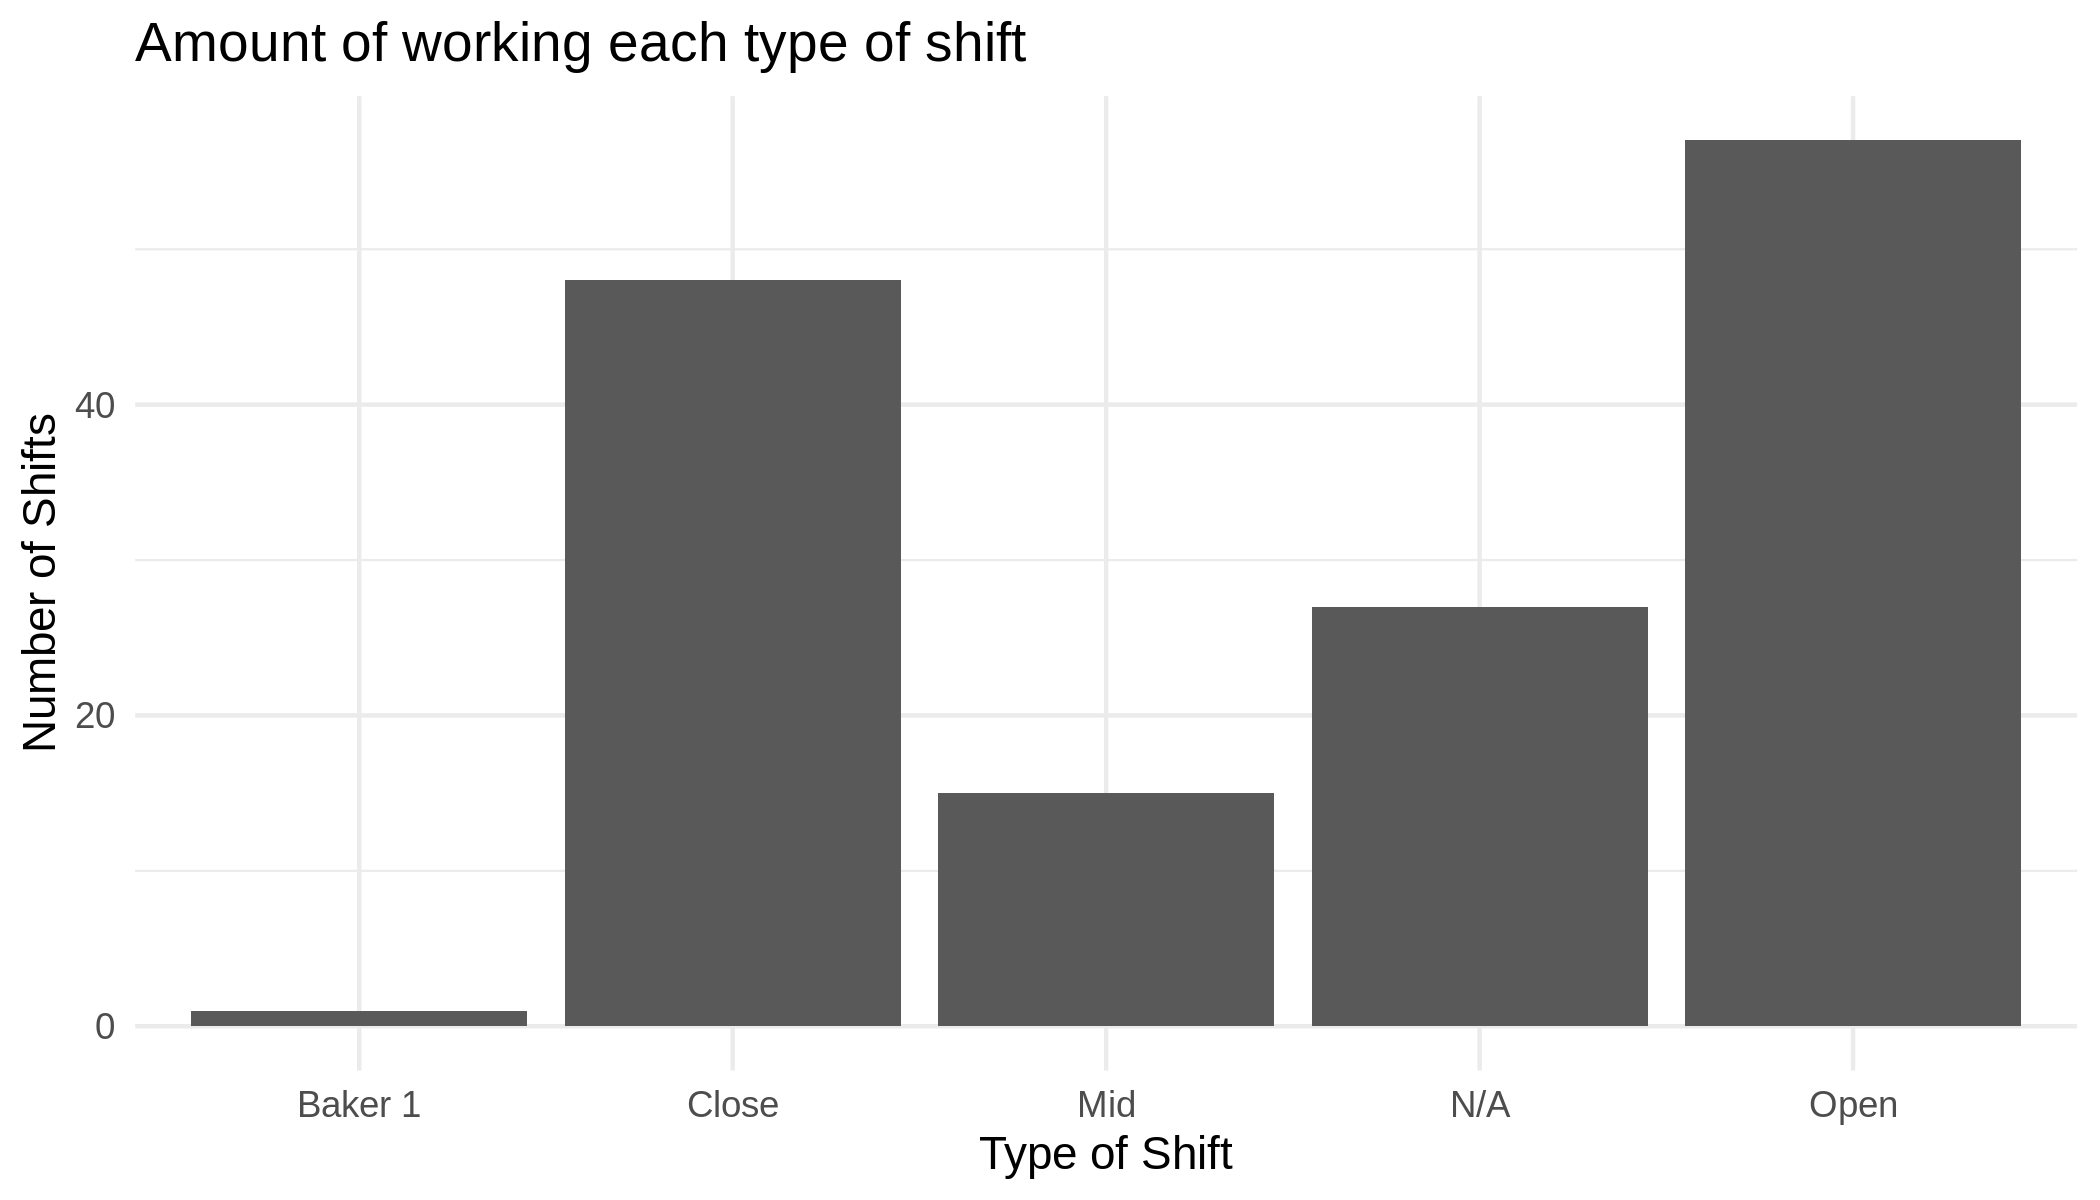

In [4]:
p3 = ggplot(Income, aes(x=Shift)) +
    geom_bar() +
    labs(title = "Amount of working each type of shift", x = "Type of Shift", y = "Number of Shifts") +
    theme_minimal()

p3

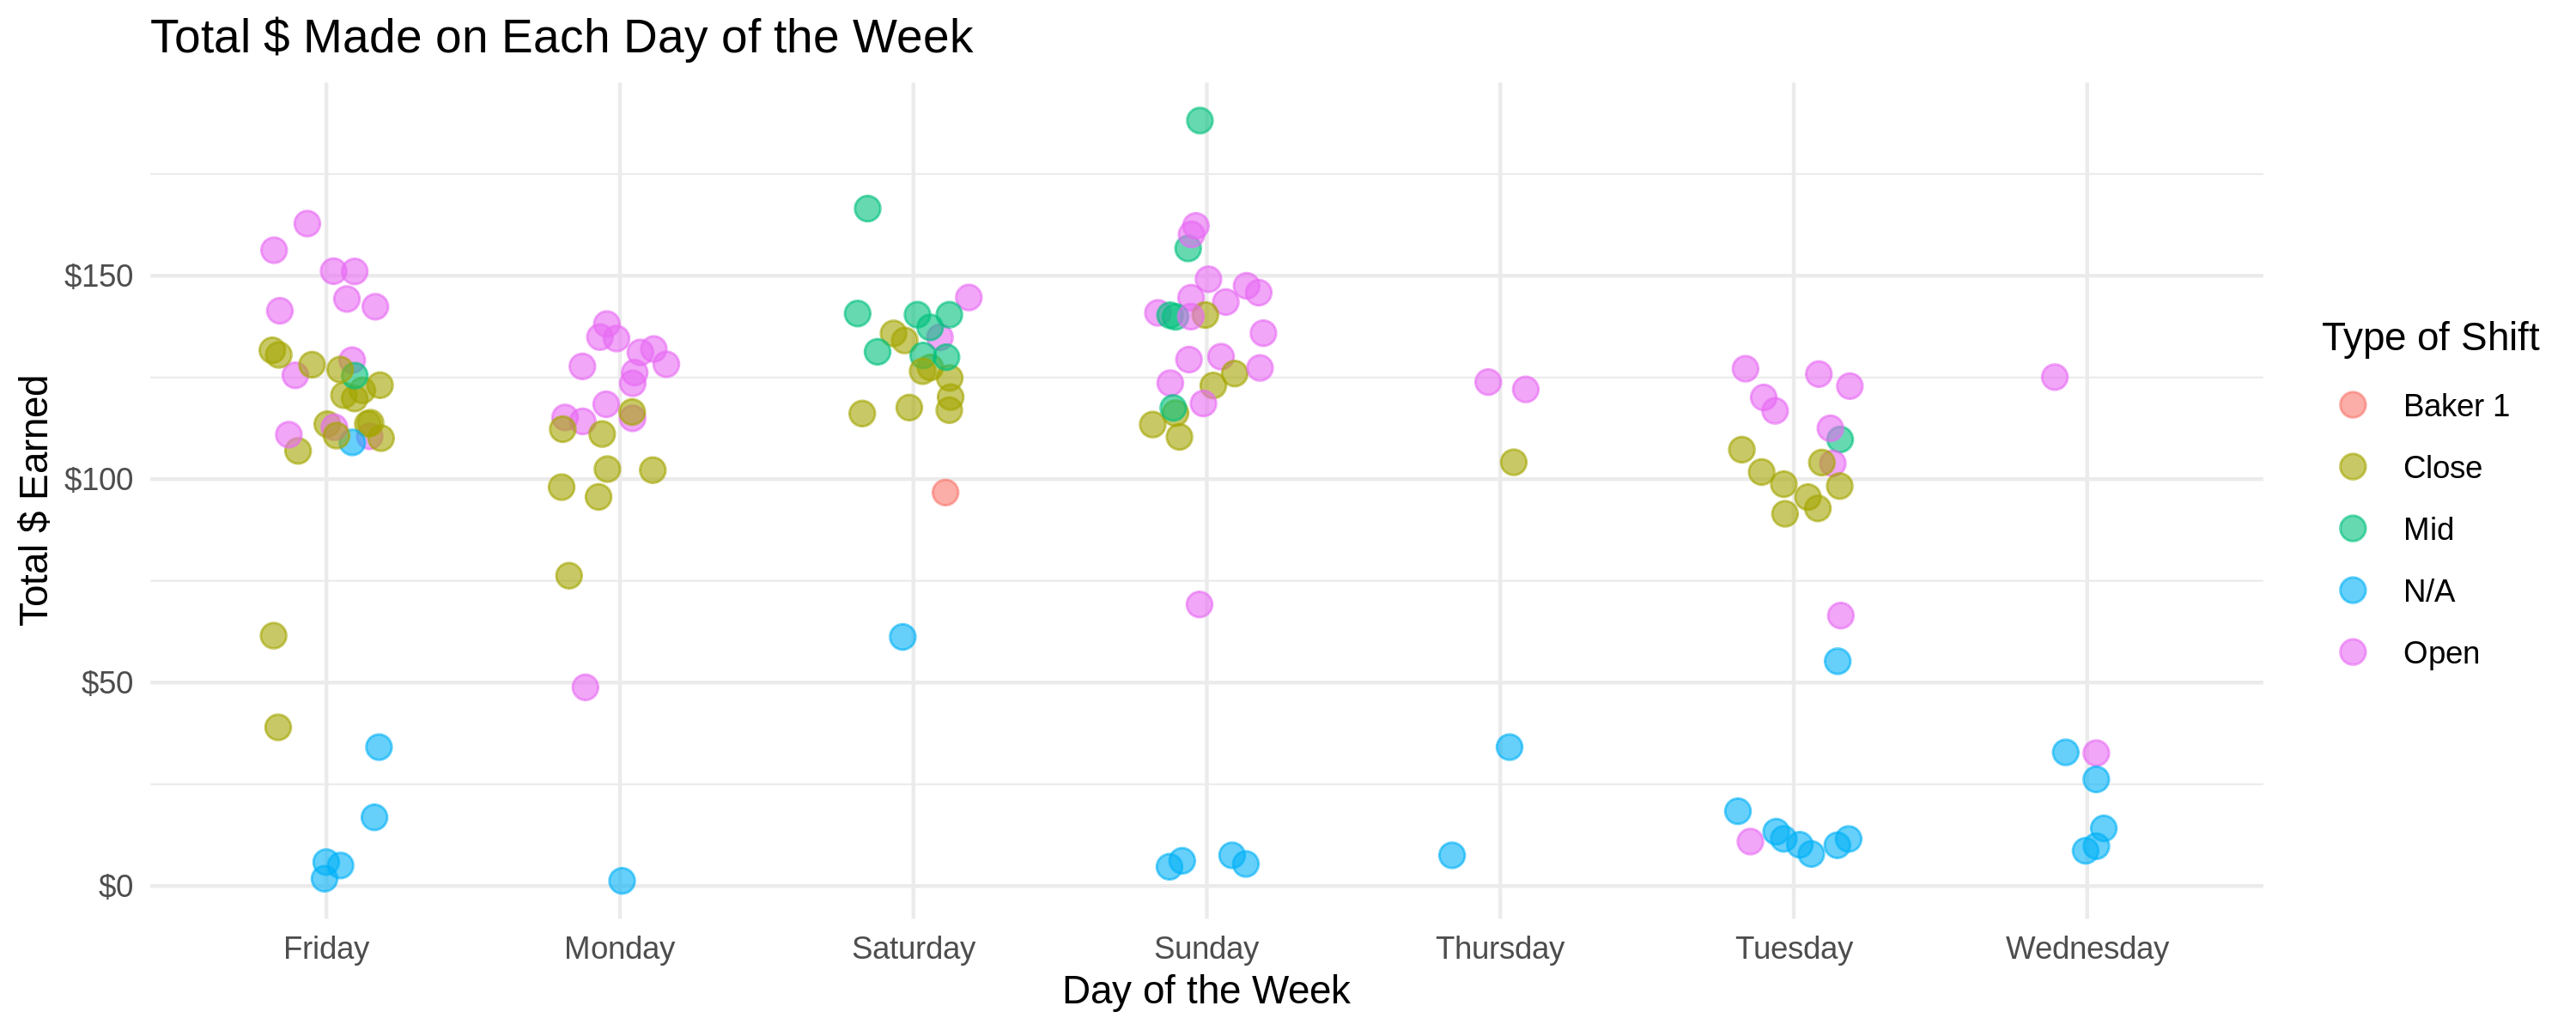

In [37]:
options( repr.plot.width = 10, repr.plot.height = 4)

# Income_Ordered = Income |>

p4 = ggplot(Income, aes(x = Day, y = Total, color = Shift)) +
    geom_point(position = position_jitter(w=0.2, h=0), alpha=0.6, size=3) +
    labs(title = "Total $ Made on Each Day of the Week", x = "Day of the Week", y = "Total $ Earned", color = "Type of Shift") +
    scale_y_continuous(labels = scales::dollar) +
    theme_minimal()

p4

In [6]:
Income_days = Income |>
    group_by(Day) |>
    summarize(N = n()) |>
    arrange(desc(N))

Income_days

Day,N
<chr>,<int>
Friday,35
Sunday,31
Tuesday,26
Monday,23
Saturday,21
Wednesday,7
Thursday,5


In [7]:
Income_Shifts = Income |>
    group_by(Shift) |>
    summarize(N = n()) |>
    arrange(desc(N))

Income_Shifts

Shift,N
<chr>,<int>
Open,57
Close,48
N/A,27
Mid,15
Baker 1,1


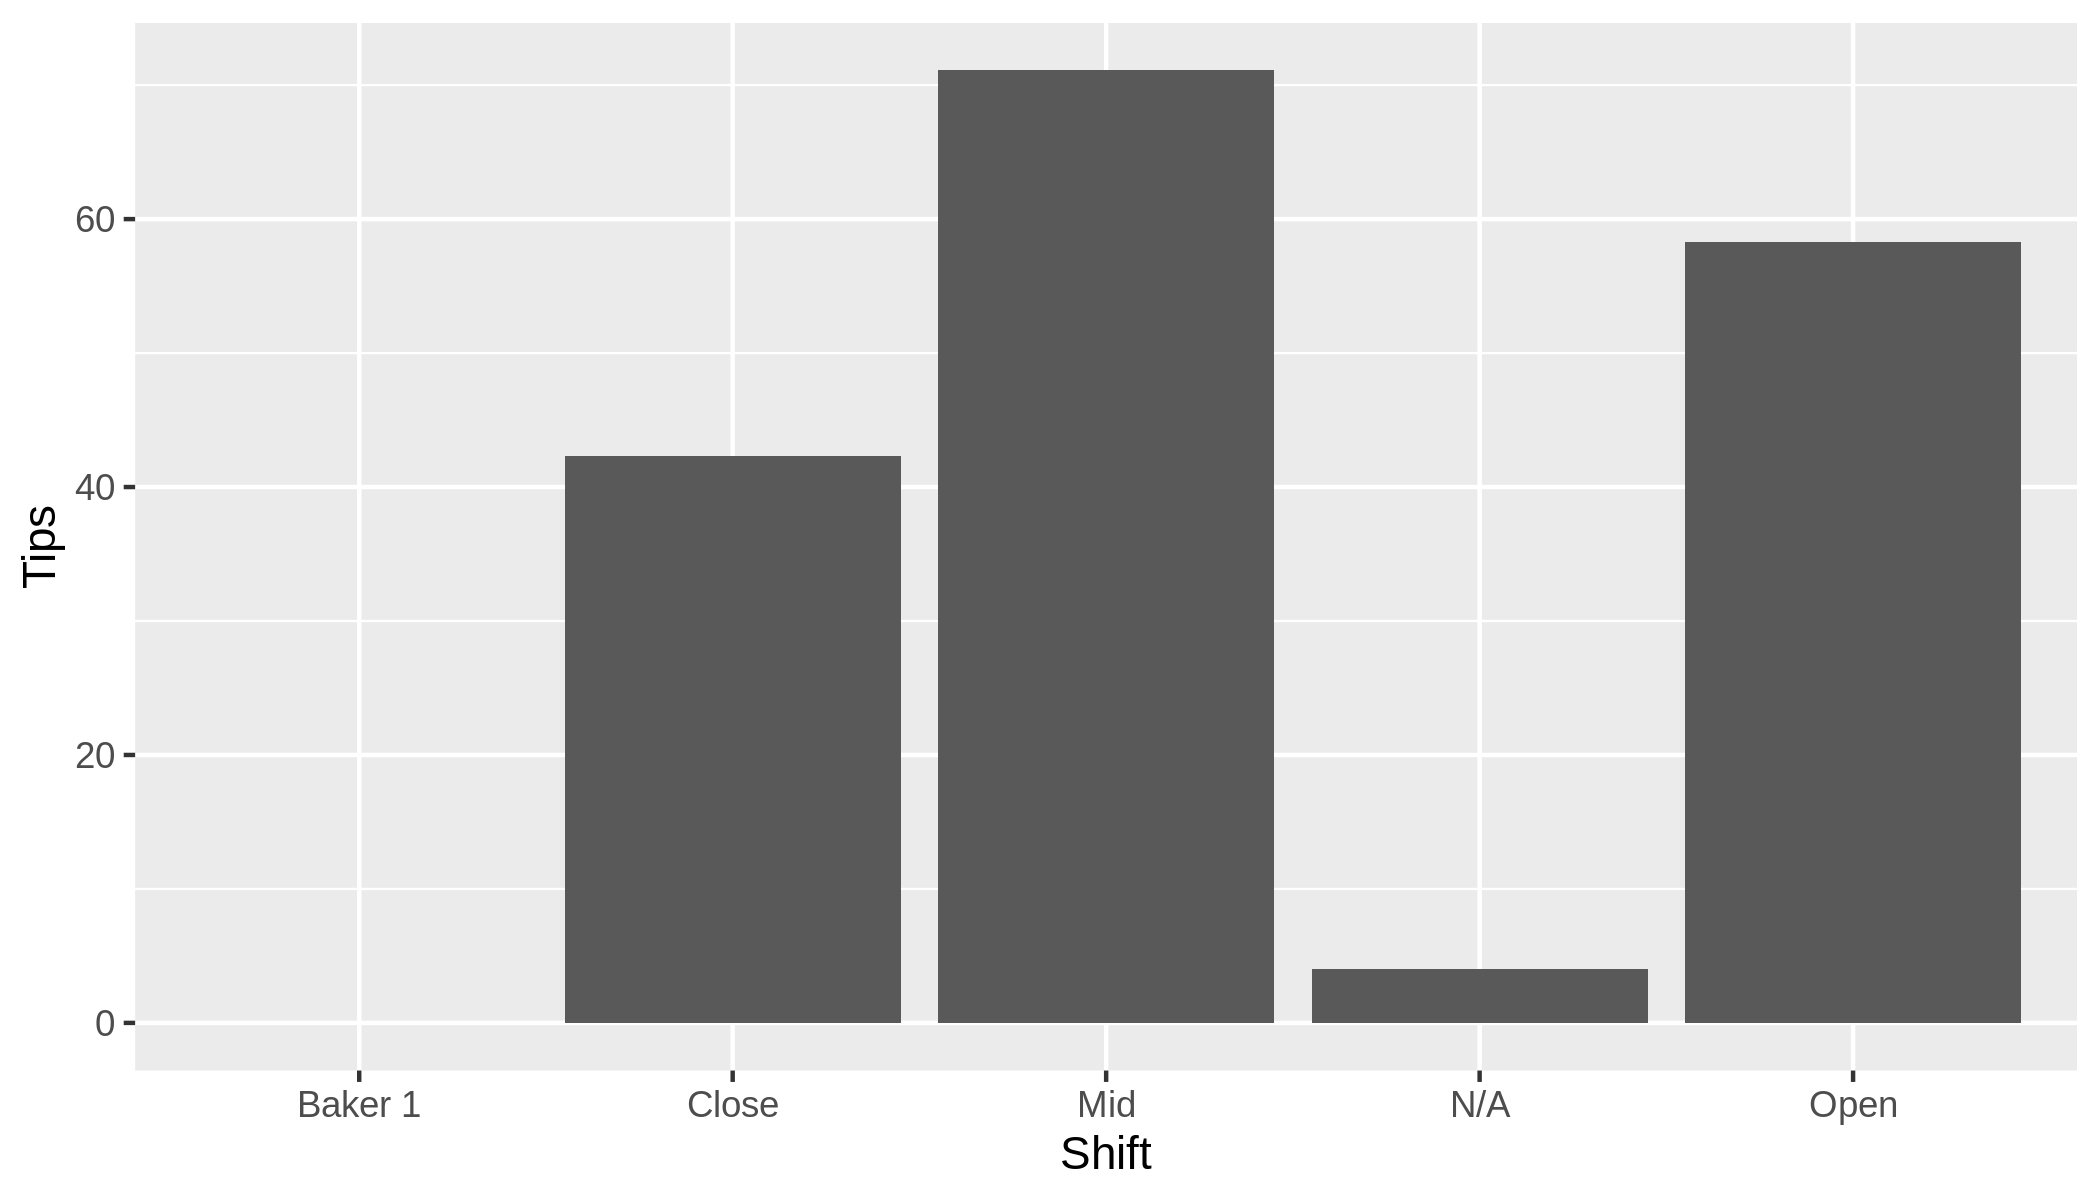

In [16]:
avg_tips = Income |>
    group_by(Shift) |>
    summarize( Tips = mean(Tips))

p5 = ggplot( data = avg_tips, aes(x = Shift, y= Tips)) +
    geom_col(na.rm = FALSE)

p5